# Pandas, indexing and other advanced data manipulation features

The past few tutorials were focussed on `Pandas`. We met some of the basic data structures in pandas.

Basic pandas objects:

* Index
* Series
* Data Frame

We also learned how these three things are related. Namely, we can think of a pandas `DataFrame` as being composed of several *named columns*, each of which is like a `Series`, and a special `Index` column along the left-hand side.

This tutorial focuses on more advanced `pandas` options to accessing, addressing (indexing) and manipulating data.

### Learning goals:

* advanced pandas objects methods – the "verbs" that make them do useful things
* indexing and accessing row/column subsets fo data
* grouped data: aggregation and pivot tables

## Make a data frame to play with

To get started this time instead of loading data from file, we will build a little data frame and take look at it to remind ourselves of this structure. We'll build a data frame similar to a data set mentioned in a previosu tutorial.

First, import `pandas` because of course, and `numpy` in order to simulate some data.

In [1]:
import pandas as pd    
import numpy as np     # to make the simulated data

Now we can make the data frame. It will have 4 variables of cardiovascular data for a number of patients (the number of patiencts can be specified):

  * systolic blood pressure
  * diastolic blood pressure
  * blood oxygenation
  * pulse rate

Given that Pandas `DataFrame`s have a special `index` column, we'll just use the `index` as "patient ID" instead of making a fifth variable dedicated to it.

In [2]:
num_patients = 10    # specify the number of patients

We will use `Numpy` to simulate data by choosing a mean for each variable and a standard deviation. More specifically, the systolic blood pressure will have a mean of `125` and a standard deviation of `5`. The diastolic pressure will have a lower mean (`80`) but the same standard deviation, the blood oxygenation will have a mean of `98.5` and a smaller standard deviation of `0.3`. Finally, the pulse rate will have a mean of `65` abd a standard deviation of `2`.

In [3]:
sys_bp = np.int64(125  + 5*np.random.randn(num_patients,))
dia_bp = np.int64(80   + 5*np.random.randn(num_patients,))
b_oxy  = np.round(98.5 + 0.3*np.random.randn(num_patients,), 2)
pulse  = np.int64(65   + 2*np.random.randn(num_patients,))

We will build the data frame using a dictionary:

In [4]:
# Make a dictionary with a "key" for each variable name, and 
# the "values" being the num_patients long data vectors
df_dict = {'systolic BP' : sys_bp,
           'diastolic BP' : dia_bp,
           'blood oxygenation' : b_oxy,
           'pulse rate' : pulse
           }
    
our_df = pd.DataFrame(df_dict)    # Now make a data frame out of the dictionary

And now lets look at it.

In [5]:
our_df

,systolic BP,diastolic BP,blood oxygenation,pulse rate
0,113,77,98.53,67
1,119,80,98.88,64
2,118,88,98.65,65
3,126,85,98.22,66
4,125,70,98.22,63
5,130,76,98.30,66
6,120,79,98.66,62
7,127,81,98.44,62
8,124,69,98.54,63
9,117,84,98.36,66


$\color{blue}{\text{Complete the following exercise.}}$

  - Use the cell below to create a dataframe with the following data:
       - 16 patients
       - systolic blood pressure 10% higher than the current
       - diastolic blood pressure 5% lower
       - blood oxygenation 2% higher
       - a 4% higher pulse rate

In [6]:
#number of patients
number_pts = 16

#10% higher systolic blood pressure = 1.1*125 = 137.5 ~138
    #same standard deviation
systolic_bp = np.int64(138 + 5*np.random.randn(number_pts,))

#5% lower diastolic blood pressure = 0.95*80 = 72
diastolic_bp = np.int64(72 + 5*np.random.randn(number_pts,))

#2% lower blood oxygenation = 0.98*98.5 = 96.5
blood_oxy = np.round(96.5 + 0.3*np.random.randn(number_pts,), 2)

#4% higher pulse rate = 1.04*65 = 67.6 ~67
pulse_rate = np.int64(67 + 2*np.random.randn(number_pts,))


#make dictionary
df_dict_new = {'Systolic Blood Pressure:' : systolic_bp,
               'Diastolic Blood Pressure:' : diastolic_bp,
               'Blood Oxygenation:' : blood_oxy,
               'Pulse Rate:' : pulse_rate}
our_df_new = pd.DataFrame(df_dict_new)
our_df_new


,Systolic Blood Pressure:,Diastolic Blood Pressure:,Blood Oxygenation:,Pulse Rate:
0,135,80,96.25,68
1,136,72,96.60,67
2,140,63,97.26,65
3,135,61,96.82,67
4,138,76,96.28,68
5,144,69,96.45,66
6,126,65,97.01,64
7,133,69,96.95,66
8,136,71,96.31,67
9,138,64,96.58,70


Now we can see the nice structure of the `DataFrame` object. We have four columns corresponding to our measurement variables, and each row is an "observation" which, in the case, corresponds to an individual patient.

To appreciate some of the features of a pandas `DataFrame`, let's compare it with a numpy `Array` holding the same information. (Which we can do because we're only dealing with numbers here - one of the main features of a pandas data frame is that it can hold non-numeric information too).

In [7]:
our_array = np.transpose(np.vstack((sys_bp, dia_bp, b_oxy, pulse)))
our_array

array([[113.  ,  77.  ,  98.53,  67.  ],
       [119.  ,  80.  ,  98.88,  64.  ],
       [118.  ,  88.  ,  98.65,  65.  ],
       [126.  ,  85.  ,  98.22,  66.  ],
       [125.  ,  70.  ,  98.22,  63.  ],
       [130.  ,  76.  ,  98.3 ,  66.  ],
       [120.  ,  79.  ,  98.66,  62.  ],
       [127.  ,  81.  ,  98.44,  62.  ],
       [124.  ,  69.  ,  98.54,  63.  ],
       [117.  ,  84.  ,  98.36,  66.  ]])

$\color{blue}{\text{Complete the following exercise.}}$

  - Explore what `.vstack` does, use the `markdown` cell below to explain what it does in your own words  

vstack takes an array and 'stacks' them in a sequence. It took the rows from our original array (our_df) and spits out the numbers we had in the array (our_array)

  - Use the following code cell to show a few examples where you create a numpy array and use vstack to change it, explain why you use chose those operations as examples

In [16]:
our_new_array = np.transpose(np.vstack((systolic_bp, diastolic_bp, blood_oxy, pulse_rate)))
np.vstack((our_new_array, our_array))


array([[135.  ,  80.  ,  96.25,  68.  ],
       [136.  ,  72.  ,  96.6 ,  67.  ],
       [140.  ,  63.  ,  97.26,  65.  ],
       [135.  ,  61.  ,  96.82,  67.  ],
       [138.  ,  76.  ,  96.28,  68.  ],
       [144.  ,  69.  ,  96.45,  66.  ],
       [126.  ,  65.  ,  97.01,  64.  ],
       [133.  ,  69.  ,  96.95,  66.  ],
       [136.  ,  71.  ,  96.31,  67.  ],
       [138.  ,  64.  ,  96.58,  70.  ],
       [146.  ,  82.  ,  96.9 ,  65.  ],
       [145.  ,  68.  ,  96.25,  67.  ],
       [137.  ,  68.  ,  96.65,  66.  ],
       [133.  ,  68.  ,  96.62,  66.  ],
       [147.  ,  67.  ,  96.79,  69.  ],
       [129.  ,  69.  ,  96.63,  67.  ],
       [113.  ,  77.  ,  98.53,  67.  ],
       [119.  ,  80.  ,  98.88,  64.  ],
       [118.  ,  88.  ,  98.65,  65.  ],
       [126.  ,  85.  ,  98.22,  66.  ],
       [125.  ,  70.  ,  98.22,  63.  ],
       [130.  ,  76.  ,  98.3 ,  66.  ],
       [120.  ,  79.  ,  98.66,  62.  ],
       [127.  ,  81.  ,  98.44,  62.  ],
       [124.  , 

We can see here that our array, `our_array`, contains exactly the same information as our dataframe, `our_df`. There are 3 main differences between the two:

* they have different verbs – things they know how to do 
* we have more ways to access the information in a data frame
* the data frame could contain non-numeric information (e.g. gender) if we wanted

(Also notice that the data frame is just prettier when printed than the numpy array)

## Verbs

Let's look at some verbs. Intuitively, it seems like both variables should *know* how to take a mean. Let's see.

In [17]:
our_array.mean()

90.91999999999999

So the numpy array does indeed know how to take the mean of itself, but it takes the mean of the entire array by default, which is not very useful in this case. If we want the mean of each variable, we have to specify that we want the means of the columns (i.e. row-wise means).

In [18]:
our_array.mean(axis=0)

array([121.9 ,  78.9 ,  98.48,  64.4 ])

But look what happens if we ask for the mean of our data frame:

In [19]:
our_df.mean()

systolic BP          121.90
diastolic BP          78.90
blood oxygenation     98.48
pulse rate            64.40
dtype: float64

Visually, that is much more organized! We have the mean of each of our variables, nicely labled by the variable name.

Data frames can also `describe()` themselves.

In [20]:
our_df.describe()

,systolic BP,diastolic BP,blood oxygenation,pulse rate
count,10.000000,10.000000,10.000000,10.000000
mean,121.900000,78.900000,98.480000,64.400000
std,5.300943,6.154492,0.213698,1.837873
min,113.000000,69.000000,98.220000,62.000000
25%,118.250000,76.250000,98.315000,63.000000
50%,122.000000,79.500000,98.485000,64.500000
75%,125.750000,83.250000,98.622500,66.000000
max,130.000000,88.000000,98.880000,67.000000


Gives us a nice summary table of the data in our data frame.

Numpy arrays don't know how to do this.

In [21]:
our_array.describe()

AttributeError: 'numpy.ndarray' object has no attribute 'describe'

Data frames can also make histograms and boxplots of themselves. They aren't publication quality, but super useful for getting a feel for our data.

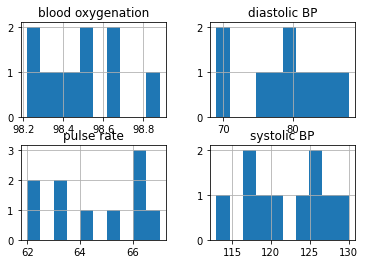

In [22]:
our_df.hist();

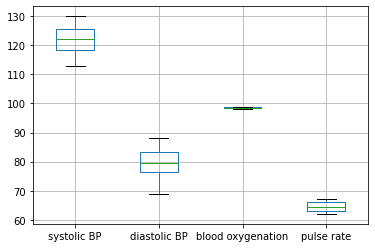

In [23]:
our_df.boxplot();

For a complete listing of what our data frame knows how to do, we can type `our_df.` and then hit the tab key.

In [25]:
our_df.align

<bound method DataFrame.align of    systolic BP  diastolic BP  blood oxygenation  pulse rate
0          113            77              98.53          67
1          119            80              98.88          64
2          118            88              98.65          65
3          126            85              98.22          66
4          125            70              98.22          63
5          130            76              98.30          66
6          120            79              98.66          62
7          127            81              98.44          62
8          124            69              98.54          63
9          117            84              98.36          66>

$\color{blue}{\text{Complete the following exercise.}}$

  - Use the next cell to report and describe two methods of `our_df`, explain why you chose those two.

In [26]:
our_df.unstack

<bound method DataFrame.unstack of    systolic BP  diastolic BP  blood oxygenation  pulse rate
0          113            77              98.53          67
1          119            80              98.88          64
2          118            88              98.65          65
3          126            85              98.22          66
4          125            70              98.22          63
5          130            76              98.30          66
6          120            79              98.66          62
7          127            81              98.44          62
8          124            69              98.54          63
9          117            84              98.36          66>

Align is a method that can give us a rough look at what our data would look like in a table. Unstack is a method that "unstacks" the data and kind of does the same thing as align.

Let's return to the `mean()` function, and see what, exactly, it is returning. We can do this by assigning the output to a variable and looking at its type.

In [27]:
our_means = our_df.mean()
our_means

systolic BP          121.90
diastolic BP          78.90
blood oxygenation     98.48
pulse rate            64.40
dtype: float64

In [28]:
type(our_means)

pandas.core.series.Series

So it is a pandas series, but, rather than the index being 0, 1, 2, 3, the *index values are actually the names of our variables*. 

If we want the mean pulse rate, *we can actually ask for it by name!*

In [29]:
our_means['pulse rate']

64.4

This introduces another key feature of pandas: **you can access data by name**.

$\color{blue}{\text{Complete the following exercise.}}$

  - Use the cell below to return the diastolic blood pressure from `our_means`

In [31]:
our_means['diastolic BP']

78.9

## Accessing data

Accessing data by name is kind of a big deal. It makes code more readable and faster and easier to write.

So, for example, let's say we wanted the mean pulse rate for our patients. Using numpy, we would have to remember or figure our which column of our numpy array was pulse rate. And we'd have to remember that Python indexes start at 0. *And* we'd have to remember that we have to tell numpy to take the mean down the columns explicitly. Ha. 

So our code might look something like...

In [36]:
np_style_means = our_array.mean(axis = 0)
print(np_style_means)
pulse_mean = np_style_means[3]
pulse_mean

[121.9   78.9   98.48  64.4 ]


64.4

Compare that to doing it the pandas way:

In [33]:
our_means = our_df.mean()
our_means['pulse rate']

64.4

The pandas way makes it very clear what we are doing! People like things to have names and, in pandas, things have names.

$\color{blue}{\text{Complete the following exercise.}}$

  - Use the cell below to compute the mean of the `diastolic pressure` both using the `numpy` method and the `pandas` method:

In [38]:

diaBP_mean = np_style_means[1]
diaBP_mean
our_means = our_df.mean()
our_means['diastolic BP']

78.9

### Accessing data using square brackets

Let's look ot our litte data frame again.

In [39]:
our_df

,systolic BP,diastolic BP,blood oxygenation,pulse rate
0,113,77,98.53,67
1,119,80,98.88,64
2,118,88,98.65,65
3,126,85,98.22,66
4,125,70,98.22,63
5,130,76,98.30,66
6,120,79,98.66,62
7,127,81,98.44,62
8,124,69,98.54,63
9,117,84,98.36,66


We can grab a column (variable) by name if we want:

In [40]:
our_df['pulse rate']

0    67
1    64
2    65
3    66
4    63
5    66
6    62
7    62
8    63
9    66
Name: pulse rate, dtype: int64

Doing this creates another `DataFrame` (or `Series`), so it knows how to do stuff to. This allows us to do things like, for example, compute the mean pulse rate in one step instead of two. Like this:

In [41]:
our_df['pulse rate'].mean()   # creates a series, then makes it compute its own mean

64.4

We can grab as many columns as we want by using a list of column names.

In [42]:
needed_cols = ['diastolic BP', 'systolic BP']   # make a list
our_df[needed_cols]                             # use the list to grab columns

,diastolic BP,systolic BP
0,77,113
1,80,119
2,88,118
3,85,126
4,70,125
5,76,130
6,79,120
7,81,127
8,69,124
9,84,117


We could also do this in one step.

In [43]:
our_df[['diastolic BP', 'systolic BP']]  # the inner brackets define our list

,diastolic BP,systolic BP
0,77,113
1,80,119
2,88,118
3,85,126
4,70,125
5,76,130
6,79,120
7,81,127
8,69,124
9,84,117


 (although the double brackets might look a little confusing at first)

$\color{blue}{\text{Complete the following exercise.}}$

  - Use the cell below to extract blood oxygenation and pulse rate using a single line of code

In [45]:
our_df[['blood oxygenation', 'pulse rate']]

,blood oxygenation,pulse rate
0,98.53,67
1,98.88,64
2,98.65,65
3,98.22,66
4,98.22,63
5,98.30,66
6,98.66,62
7,98.44,62
8,98.54,63
9,98.36,66


### Getting row and row/column combinations of data: "indexing"

**Terminology Warning!** "Indexing" is a general term which means "accessing data by location". In pandas, as we have seen, objects like DataFrames also have an "index" which is a special column of row identifiers. So, in pandas, we can index data using column names, row names (indexing using the index), or both. (We can also index into pandas data frames as if they were numpy arrays, which sometimes comes in handy.)

#### Changing the index to make (row) indexing more intuitive

Speaking of indexes, it's a little weird to have our patient IDs start at "0". Both because "patient zero" has a special meaning and also because it's just not intuitive to number a sequence of actual things starting at "0".

Fortunately, pandas `DataFrame` (and `Series`) objects allow you to customize their index column fairly easily.

Let's set the index to start at 1 rather than 0:

In [46]:
my_ind = np.linspace(1, 10, 10)  # make a sequence from 1 to 10
my_ind = np.int64(my_ind)        # change it from decimal to integer (not really necessary, but...)

Let's take a look at this index:

In [47]:
print(my_ind)

[ 1  2  3  4  5  6  7  8  9 10]


In [48]:
our_df.index = my_ind

In [49]:
our_df

,systolic BP,diastolic BP,blood oxygenation,pulse rate
1,113,77,98.53,67
2,119,80,98.88,64
3,118,88,98.65,65
4,126,85,98.22,66
5,125,70,98.22,63
6,130,76,98.30,66
7,120,79,98.66,62
8,127,81,98.44,62
9,124,69,98.54,63
10,117,84,98.36,66


$\color{blue}{\text{Complete the following exercise.}}$

  - Use the next cell to create a new index variable using numpy the variable should start at 5 and cintinue to 15 with 10 steps in between 

In [52]:
my_new_ind = np.linspace(5, 15, 10)
my_new_ind = np.int64(my_new_ind)
print(my_new_ind)


[ 5  6  7  8  9 10 11 12 13 15]


### Accessing data using `pd.DataFrame.loc[]`

In the section above, we saw that you can get columns of data our of a data frame using square brackets `[]`. Pandas data frames also know how to give you subsets of rows or row/column combinations.  

The primary method for accessing specific bits of data from a pandas data frame is with the `loc[]` verb. It provides an easy way to get rows of data based upon the index column. In other words, `loc[]` is the way we use the data frame index as an index!

So this will give us the data for patient number 3:

In [53]:
our_df.loc[3]

systolic BP          118.00
diastolic BP          88.00
blood oxygenation     98.65
pulse rate            65.00
Name: 3, dtype: float64

**Note!** The above call did **not** behave like a Python or numpy index! If it had, we would have gotten the data for patient number 4 because Python and numpy use *zero based indexing*. 

But using the `loc[]` function gives us back the row "named" 3. We literally get what we asked for! Yay!

We can also *slice* out rows in chunks:

In [54]:
our_df.loc[3:6]

,systolic BP,diastolic BP,blood oxygenation,pulse rate
3,118,88,98.65,65
4,126,85,98.22,66
5,125,70,98.22,63
6,130,76,98.30,66


Which, again, gives us what we asked for without having to worry about the zero-based business.

But `.loc[]` also allows us to get specfic columns too. Like:

In [55]:
our_df.loc[3:6, 'blood oxygenation']

3    98.65
4    98.22
5    98.22
6    98.30
Name: blood oxygenation, dtype: float64

For a single column, or:

In [56]:
our_df.loc[3:6,'systolic BP':'blood oxygenation']

,systolic BP,diastolic BP,blood oxygenation
3,118,88,98.65
4,126,85,98.22
5,125,70,98.22
6,130,76,98.30


for multiple columns.

In summary, there are 3 main ways to get chunks of data out of a data frame "by name".

* square brackets (only) gives us columns, e.g. `our_df['systolic BP']`
* `loc[]` with one argument gives us rows, e.g. `our_df.loc[3]`
* `loc[]` with two arguments gives us row-column combinations, e.g. `our_df.loc[3,'systolic BP']`

Additionally, with `loc[]`, we can specify index ranges for the rows or columns or both, e.g. `new_df.loc[3:6,'systolic BP':'blood oxygenation']`

One final thing about using `loc[]` is that the index column in a `DataFrame` doesn't have to be numbers. It can be date/time strings (as we'll see later on), or just plain strings (as we've seen above with `Series` objects).

$\color{blue}{\text{Complete the following exercise.}}$

  - Use the next cell to create a data frame of heart measurements where the index is the name of the patients (name and surname, make them up!):

In [58]:
pt_name_dict = {'Gary Smalls' : 0,
                'Becca Trevino' : 1,
                'Nyx Cooper' : 2,
                'Danny McGuire' : 3,
                'Billy Garage' : 4,
                'Jim Stone' : 5,
                'Michael Ray' : 6,
                'Seven Costanza' : 7,
                'Vicky Brand' : 8,
                'Kyle Pratt' : 9}
our_df.index = pt_name_dict
print(our_df)

                systolic BP  diastolic BP  blood oxygenation  pulse rate
Gary Smalls             113            77              98.53          67
Becca Trevino           119            80              98.88          64
Nyx Cooper              118            88              98.65          65
Danny McGuire           126            85              98.22          66
Billy Garage            125            70              98.22          63
Jim Stone               130            76              98.30          66
Michael Ray             120            79              98.66          62
Seven Costanza          127            81              98.44          62
Vicky Brand             124            69              98.54          63
Kyle Pratt              117            84              98.36          66


Let's look at a summary of our data using the `describe()` method:

In [59]:
our_sum = our_df.describe()
our_sum

,systolic BP,diastolic BP,blood oxygenation,pulse rate
count,10.000000,10.000000,10.000000,10.000000
mean,121.900000,78.900000,98.480000,64.400000
std,5.300943,6.154492,0.213698,1.837873
min,113.000000,69.000000,98.220000,62.000000
25%,118.250000,76.250000,98.315000,63.000000
50%,122.000000,79.500000,98.485000,64.500000
75%,125.750000,83.250000,98.622500,66.000000
max,130.000000,88.000000,98.880000,67.000000


This looks suspiciously like a data frame except the index column looks like they're... er... not indexes. Let's see.

In [60]:
type(our_sum)

pandas.core.frame.DataFrame

Yep, it's a data frame! But let's see if that index column actually works:

In [61]:
our_sum.loc['mean']

systolic BP          121.90
diastolic BP          78.90
blood oxygenation     98.48
pulse rate            64.40
Name: mean, dtype: float64

Note that, with a `Series` object, we use square brackets (only) to get  rows. With a `DataFrame`, square brackets (only) are used to get columns. It won't work for `DataFrame` objects:

In [62]:
our_sum['mean']

KeyError: 'mean'

So, with a `DataFrame`, we have to use `.loc[]` to get rows.

And now we can slice out (get a range of) rows:

In [63]:
our_sum.loc['count':'std']

,systolic BP,diastolic BP,blood oxygenation,pulse rate
count,10.000000,10.000000,10.000000,10.000000
mean,121.900000,78.900000,98.480000,64.400000
std,5.300943,6.154492,0.213698,1.837873


Or rows and columns:

In [64]:
our_sum.loc['count':'std', 'systolic BP':'diastolic BP']

,systolic BP,diastolic BP
count,10.000000,10.000000
mean,121.900000,78.900000
std,5.300943,6.154492


### Accessing data using pd.DataFrame.iloc[]

Occasionally, you might want to treat a pandas `DataFrame` as a numpy `Array` and index into it using the *implicit* row and column indexes (which start as zero of course). So support this, pandas `DataFrame` objects also have an `iloc[]`.

Let's look at our data frame again:

In [65]:
our_df

,systolic BP,diastolic BP,blood oxygenation,pulse rate
Gary Smalls,113,77,98.53,67
Becca Trevino,119,80,98.88,64
Nyx Cooper,118,88,98.65,65
Danny McGuire,126,85,98.22,66
Billy Garage,125,70,98.22,63
Jim Stone,130,76,98.30,66
Michael Ray,120,79,98.66,62
Seven Costanza,127,81,98.44,62
Vicky Brand,124,69,98.54,63
Kyle Pratt,117,84,98.36,66


And let's check its shape:

In [66]:
our_df.shape

(10, 4)

At some level, then, Python considers this to be just a 10x4 array (like a numpy array). This is were `iloc[]` comes in; `iloc[]` will treat the data frame as though it were a numpy array – no names!

So let's index into `our–df` using `iloc[]`:

In [67]:
our_df.iloc[3]  # get the fourth row

systolic BP          126.00
diastolic BP          85.00
blood oxygenation     98.22
pulse rate            66.00
Name: Danny McGuire, dtype: float64

And compare that to using `loc[]`:

In [68]:
our_df.loc[3]

TypeError: cannot do label indexing on <class 'pandas.core.indexes.base.Index'> with these indexers [3] of <class 'int'>

And of course you can slice out rows and columns:

In [69]:
our_df.iloc[2:5, 0:2]

,systolic BP,diastolic BP
Nyx Cooper,118,88
Danny McGuire,126,85
Billy Garage,125,70


Indexing using `iloc[]` is rarely needed on regular data frames (if you're using it, you should probably be working with a numpy `Array`).

It is, however, very handy for pulling data out of summary data tables (see below).

## Non-numerical information (categories or factors)

One of the huge benefits of pandas objects is that, unlike numpy arrays, they can contain categorical variables.

### Make another data frame to play with

Let's use tools we've learned to make a data frame that has both numerical and categorical variables.

First, we'll make the numerical data:

In [70]:
num_patients = 20    # specify the number of patients

# make some simulated data with realistic numbers.
sys_bp = np.int64(125 + 5*np.random.randn(num_patients,))
dia_bp = np.int64(80 + 5*np.random.randn(num_patients,))
b_oxy = np.round(98.5 + 0.3*np.random.randn(num_patients,), 2)
pulse = np.int64(65 + 2*np.random.randn(num_patients,))


(Now we'll make them interesting – this will be clear later)

In [71]:
sys_bp[0:10] = sys_bp[0:10] + 15
dia_bp[0:10] = dia_bp[0:10] + 15
sys_bp[0:5] = sys_bp[0:5] + 5
dia_bp[0:5] = dia_bp[0:5] + 5
sys_bp[10:15] = sys_bp[10:15] + 5
dia_bp[10:15] = dia_bp[10:15] + 5

Now let's make a categorical variable indicating whether the patient is diabetic or not. We'll make the first half be diabetic.

In [72]:
diabetic = pd.Series(['yes', 'no'])  # make the short series
diabetic = diabetic.repeat(num_patients/2)       # repeat each over two cell's worth of data
diabetic = diabetic.reset_index(drop=True)      # reset the series's index value

In [73]:
print(diabetic)

0     yes
1     yes
2     yes
3     yes
4     yes
5     yes
6     yes
7     yes
8     yes
9     yes
10     no
11     no
12     no
13     no
14     no
15     no
16     no
17     no
18     no
19     no
dtype: object


Now will make an "inner" sex variable.

In [74]:
sex = pd.Series(['male', 'female'])             # make the short series

In [75]:
print(sex)

0      male
1    female
dtype: object


In [76]:
sex = sex.repeat(num_patients/4)                 # repeat each over one cell's worth of data

In [77]:
print(sex)

0      male
0      male
0      male
0      male
0      male
1    female
1    female
1    female
1    female
1    female
dtype: object


In [78]:
sex = pd.concat([sex]*2, ignore_index=True)   # stack or "concatenate" two copies

In [79]:
print(sex)

0       male
1       male
2       male
3       male
4       male
5     female
6     female
7     female
8     female
9     female
10      male
11      male
12      male
13      male
14      male
15    female
16    female
17    female
18    female
19    female
dtype: object


Now we'll make a dictionary containing all our data.

In [80]:
# Make a dictionary with a "key" for each variable name, and 
# the "values" being the num_patients long data vectors
df_dict = {'systolic BP' : sys_bp,
           'diastolic BP' : dia_bp,
           'blood oxygenation' : b_oxy,
           'pulse rate' : pulse,
           'sex': sex,
           'diabetes': diabetic
           }
    

And turn it into a data frame.

In [81]:
new_df = pd.DataFrame(df_dict)    # Now make a data frame out of the dictionary

Finally, let's up our game and make a more descriptive index column!

In [82]:
basename = 'patient '                      # make a "base" row name
my_index = []                             # make an empty list
for i in range(1, num_patients+1) :       # use a for loop to add
    my_index.append(basename + str(i))     # id numbers so the base name

Assign our new row names to the index of our data frame.

In [83]:
new_df.index = my_index

Let's look at our creation!

In [84]:
new_df

,systolic BP,diastolic BP,blood oxygenation,pulse rate,sex,diabetes
patient 1,148,101,98.43,64,male,yes
patient 2,152,103,98.50,68,male,yes
patient 3,141,95,98.33,63,male,yes
patient 4,146,88,98.79,66,male,yes
patient 5,144,98,98.42,61,male,yes
patient 6,141,98,98.45,62,female,yes
patient 7,142,95,98.76,61,female,yes
patient 8,133,93,98.23,65,female,yes
patient 9,144,93,98.26,66,female,yes
patient 10,135,94,98.72,63,female,yes


### Looking at our data

Another really nice thing about pandas `DataFrames` is that they naturally lend themselves to interrogation via the visualization library `Seaborn` (we will learn about this library more in future tutorials). 

So let's peek at some stuff.

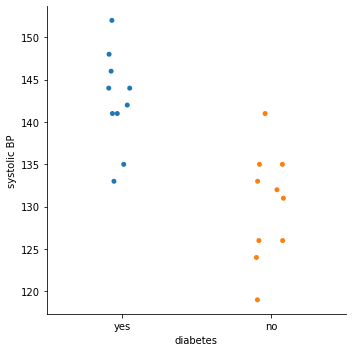

In [85]:
import seaborn as sns

sns.catplot(data=new_df, x='diabetes', y='systolic BP');

Okay, now let's go crazy and do a bunch of plots.

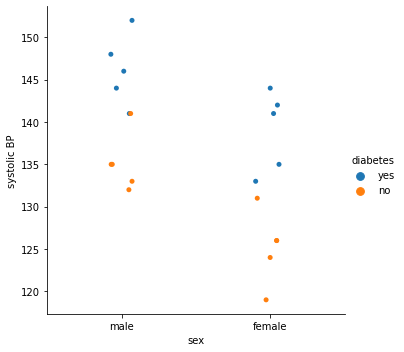

In [86]:
sns.catplot(data=new_df, x='sex', y='systolic BP', hue='diabetes');

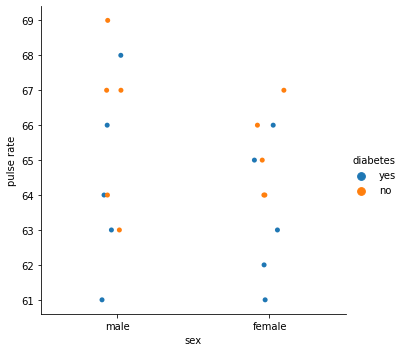

In [87]:
sns.catplot(data=new_df, x='sex', y='pulse rate', hue='diabetes');

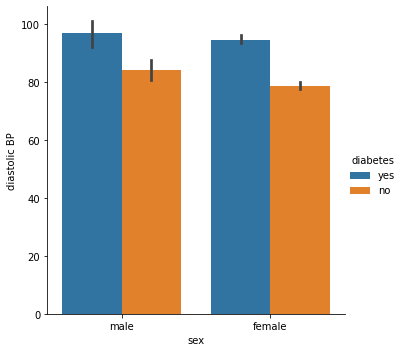

In [88]:
sns.catplot(data=new_df, x='sex', y='diastolic BP', hue='diabetes', kind='bar');

### Computing within groups

Now that we have an idea of what's going on, let's look at how we could go about computing things like the mean systolic blood pressure in females vs. males, etc.

#### Using the `groupby()` method

Data frames all have a `group_by()` method that, as the name implies, will group our data by a categorical variable. Let's try it.

In [89]:
new_df.groupby('sex')

So this gave us a `DataFrameGroupBy` object which, in and of itself, is very useful. However, *it knows how to do things*!

In general, `GroupBy` objects know how to do pretty much anything that regular `DataFrame` objects do. So, if we want the mean by gender, we can ask the `GroupBy` (for short) object to give us the mean:

In [90]:
new_df.groupby('sex').mean()

,systolic BP,diastolic BP,blood oxygenation,pulse rate
sex,,,,
female,132.1,86.6,98.307,64.3
male,140.7,90.5,98.436,65.2


#### Using the `groupby()` followed by `aggregate()`

More powerfully, we can use a `GroupBy` object's `aggregate()` method to compute many things at once.

In [91]:
new_df.groupby('diabetes').aggregate(['mean', 'std', 'min', 'max'])

systolic BP                     diastolic BP                     \
                mean       std  min  max         mean       std min  max   
diabetes                                                                   
no             130.2  6.442912  119  141         81.3  4.137901  77   90   
yes            142.6  5.660781  133  152         95.8  4.341019  88  103   

         blood oxygenation                         pulse rate                \
                      mean       std    min    max       mean       std min   
diabetes                                                                      
no                  98.254  0.387734  97.58  98.99       65.6  1.897367  63   
yes                 98.489  0.203331  98.23  98.79       63.9  2.330951  61   

              
         max  
diabetes      
no        69  
yes       68

Okay, what's going on here? First, we got a lot of information out. Second, we got a warning because pandas couldn't compute the mean, etc., on the gender variable, which is perfectly reasonable of course.

We can handle this by using our skills to carve out a subset of our data frame – just the columns of interest – and then use `groupby()` and `aggregate()` on that.

In [92]:
temp_df = new_df[['systolic BP', 'diastolic BP', 'diabetes']]        # make a data frame with only the columns we want
our_summary = temp_df.groupby('diabetes').aggregate(['mean', 'std', 'min', 'max'])     # compute stuff on those columns
our_summary

systolic BP                     diastolic BP                   
                mean       std  min  max         mean       std min  max
diabetes                                                                
no             130.2  6.442912  119  141         81.3  4.137901  77   90
yes            142.6  5.660781  133  152         95.8  4.341019  88  103

Notice here that there are *groups of columns*. Like there are two "meta-columns", each with four data columns in them. This makes getting the actual values out of the table for further computation, etc., kind of a pain. It's called "multi-indexing" or "hierarchical indexing". It's a pain.

Here are a couple examples.

In [93]:
our_summary[("systolic BP", "mean")]

diabetes
no     130.2
yes    142.6
Name: (systolic BP, mean), dtype: float64

In [94]:
our_summary.loc[("no")]

systolic BP   mean    130.200000
              std       6.442912
              min     119.000000
              max     141.000000
diastolic BP  mean     81.300000
              std       4.137901
              min      77.000000
              max      90.000000
Name: no, dtype: float64

Of course, we could do the blood pressure variables separately and store them for later plotting, etc.

In [95]:
temp_df = new_df[['systolic BP', 'diabetes']]        # make a data frame with only the columns we want
our_summary = temp_df.groupby('diabetes').aggregate(['mean', 'std', 'min', 'max'])     # compute stuff on those columns
our_summary

systolic BP                    
                mean       std  min  max
diabetes                                
no             130.2  6.442912  119  141
yes            142.6  5.660781  133  152

But we still have a meta-column label!

Here's were `.iloc[]` comes to the rescue!

If we look at the shape of the summary:

In [96]:
our_summary.shape

(2, 4)

We see that, ultimately, the data is just a 2x4 table. So if we want, say, the standard deviation of non-diabetics, we can just do:

In [97]:
our_summary.iloc[0, 1]

6.44291169511977

And we get back a pure number.

We can also do things "backwards", that is, instead of subsetting the data and then doing a `groupby()`, we can do the `groupby()` and then index into it and compute what we want. For example, if we wanted the mean of systolic blood pressure grouped by whether patients had diabetes or not, we could go one of two ways.

We could subset and then group:

In [98]:
new_df[['systolic BP', 'diabetes']].groupby('diabetes').mean()

,systolic BP
diabetes,
no,130.2
yes,142.6


Or we could group and then subset:

In [99]:
new_df.groupby('diabetes')[['systolic BP']].mean()

,systolic BP
diabetes,
no,130.2
yes,142.6


Okay, first, it's cool that there are multiple ways to do things. Second – **aarrgghh!** – things are starting to get complicated and code is getting hard to read!

#### Using pivot tables

"Pivot tables" (so named because allow you to look at data along different dimensions or directions) provide a handy solution for summarizing data.

By default, pivot tables tabulate the mean of data. So if we wish to compute the average systolic blood pressure broken out by diabetes status, all we have to do is:

In [100]:
new_df.pivot_table('systolic BP', index='diabetes')

,systolic BP
diabetes,
no,130.2
yes,142.6


Here, `index` is used in the "row names" sense of the word.

We can also have another grouping variables map to the columns of the output if we wish:

In [101]:
new_df.pivot_table('systolic BP', index='diabetes', columns='sex')

sex,female,male
diabetes,,
no,125.2,135.2
yes,139.0,146.2


Finally, we can specify pretty much any other summary function we want to "aggregate" by:

In [102]:
new_df.pivot_table('systolic BP', index='diabetes', columns='sex', aggfunc='median')

sex,female,male
diabetes,,
no,126,135
yes,141,146


If you want to customize the column names using the aggregate function, you can (Though it is somewhat limited)! Look at the example down below for an explanation

In [103]:
new_df.groupby('diabetes').aggregate(Mean=('systolic BP',"mean"))

,Mean
diabetes,
no,130.2
yes,142.6


The "Mean" is your new title, while inside the second set of parantheses is where/what you wantthe aggregate function to calculate

However, as you might have noticed, this is fairly limited. It removes the meta column titles, replacing them with the title of your choice. This can make it somewhat dificult to interpret your tables. Additionally, you can't have any spaces in the new title of your choice. 

In [104]:
 new_df.groupby('diabetes').aggregate(Mean=('systolic BP',"mean"),
                                      Standard_Deviation = ('systolic BP',"std"))

,Mean,Standard_Deviation
diabetes,,
no,130.2,6.442912
yes,142.6,5.660781


## vs.

In [105]:
new_df.groupby('diabetes').aggregate( Mean=('systolic BP',"mean"), STD = ('systolic BP',"std"))

,Mean,STD
diabetes,,
no,130.2,6.442912
yes,142.6,5.660781


(Where `aggfunc` can me 'min', 'sum', 'std', etc., etc.)

## Summary

In this tutorial, we have covered some key aspects of working with data using pandas data frames. These were:

* doing things with data using the methods – the verbs – of pandas objects
* accessing subsets of the data with 
     - square brackets
     - the `.loc[]` method
     - the `.iloc[]` method
* assembling data frames and customizing the index
* grouping data and computing summaries using
     - `groupby()` and `aggregate()`
     - pivot tables

## $\color{blue}{\text{Complete the following exercise.}}$

1. Make a data frame that has
    * one categorical variable, "bilingual", that splits the data in half ("yes" and "no")
    * two numerical variables, verbal GRE and quant GRE 
    * (you can build in, or not, whatever effect of bilingual you wish)
    * (GRE scores have a mean of about 151 and a std. dev. of about 8.5)
2. Set the index to be "Student 1", "Student 2", etc.
3. Do a seaborn plot of verbal GRE vs. bilinguality (is that a word?)
4. Make another one of quant GRE vs. bilingual status
5. Compute the mean and standard *error* of each score separated by bilingual status (using any method you wish!)

In [107]:
#number of students
num_stu = 10

#bilingual variable- categorical; yes or no
bilingual = pd.Series(['yes', 'no']) 
bilingual = bilingual.repeat(num_patients/2)       
bilingual = bilingual.reset_index(drop=True)    

#verbal GRE variable- numerical, mean 145 std 8
v_gre = np.int64(145 + 8*np.random.randn(num_stu,))

#quant GRE variable- numerical, mean 152 std 7
q_gre = np.int64(152 + 7*np.random.randn(num_stu,))

#create data frame of these variables
    #make a dictionary
df_dict = {'Bilingual:' : bilingual,
               'Verbal GRE:' : v_gre,
               'Quant Gre:' : q_gre}
    #put into dataframe
our_df = pd.DataFrame(df_dict)







ValueError: array length 10 does not match index length 20